# Blood Glucose Control - EDA

**Name:** Anton Ryavkin



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD.

In [23]:
import pandas as pd
import re
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('gluroo_500030.csv')
df2 = pd.read_csv('gluroo_679372.csv')

df1["PWD"] = 0 #from here onwards, 500030 is Patient 0 and 678372 is Patient 1
df2["PWD"] = 1
df = pd.concat([df1, df2])

df.head()

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,PWD
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0


We need to convert date into datetime for further analysis:



In [24]:
df["date"] = pd.to_datetime(df["date"].str[0:-6], format="%Y-%m-%d %H:%M:%S", exact = False) #remove trailing characters

NOTE: I will be mainly using mmol/l for the bgl measurement

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet.

Ideas:


*   Check the insulin levels during holidays/seasons
*   Summary graph
*   Contrast patients





#### Data Visualization #1: Food Distribution

For this visualization, we will attempt to investigate which foods are popular among our two patients. First, we will process the messages that are entered by the user when they log their meal. We will also assign a binary "health" score to each food type (healthy" or "unhealthy").

First, let's create a list of foods we will be dealing with:

In [56]:
all_food = df[(df["msg_type"] == "ANNOUNCE_MEAL")]["text"].str.cat(sep=' ').lower()

Ideally, we would create a corpus of foods that can occur in our data and use NLP techniques such as lemmatization to identify them. However, I couldn't find a suitable corpus, so instead I asked ChatGPT to identify foods within the text above, as well as evaluate the "healthiness" of each food. Although it is not the most precise solution, it gets the job done for now:

In [26]:
foods = {
  'Cappuccino': 'healthy',
  'Eggs': 'healthy',
  'Toast': 'unhealthy',
  'Mandarin': 'healthy',
  'Wasa': 'healthy',
  'Nutella': 'unhealthy',
  'RX Bar': 'healthy',
  'Chick-fil-A salad': 'healthy',
  'Nuggets': 'unhealthy',
  'Chips': 'unhealthy',
  'Taffy': 'unhealthy',
  'Coffee creamer': 'unhealthy',
  'Sandwich': 'unhealthy',
  'Chocolate': 'unhealthy',
  'Ice cream': 'unhealthy',
  'Bar': 'unhealthy',
  'Crackers': 'unhealthy',
  'Burrito': 'unhealthy',
  'Quiche': 'unhealthy',
  'Pastries': 'unhealthy',
  'Gyro bowl': 'unhealthy',
  'Basmati rice': 'healthy',
  'Graham crackers': 'unhealthy',
  'Salad': 'healthy',
  'Beer': 'unhealthy',
  'Mac n cheese': 'unhealthy',
  'Breakfast burrito': 'unhealthy',
  'Cafe au lait': 'healthy',
  'Bread': 'unhealthy',
  'Soup': 'healthy',
  'Omelette': 'healthy',
  'Strawberries': 'healthy',
  'Latte': 'healthy',
  'Taco Bell': 'unhealthy',
  'Salmon': 'healthy',
  'Pineapple': 'healthy',
  'Waffle': 'unhealthy',
  'Blueberries': 'healthy',
  'M&Ms': 'unhealthy',
  'Trail mix': 'healthy',
  'Sweet potato fries': 'healthy',
  'Yogurt bowl': 'healthy',
  'Berries': 'healthy',
  'Walnuts': 'healthy',
  'Chicken tenders': 'unhealthy',
  'Broccoli': 'healthy',
  'Pie': 'unhealthy',
  'Pastry': 'unhealthy',
  'Mochas': 'healthy',
  'Guacamole': 'healthy',
  'Beef': 'healthy',
  'Rice': 'unhealthy',
  'Pad Thai': 'unhealthy',
  'Taco': 'unhealthy',
  'Popcorn': 'unhealthy',
  'Meatballs': 'healthy',
  'Pizza': 'unhealthy',
  'Caesar salad': 'healthy',
  'Chicken biscuit': 'unhealthy',
  'English muffin': 'unhealthy',
  'Ham': 'unhealthy',
  'Pancake': 'unhealthy',
  'Coconut cream pie': 'unhealthy',
  'Gelato': 'unhealthy',
  'French fries': 'unhealthy',
  'Risotto': 'unhealthy',
  'Fajitas': 'unhealthy',
  'Cookies': 'unhealthy',
  'Brownie': 'unhealthy',
  'Ribs': 'unhealthy',
  'Sausage': 'unhealthy',
  'Avocado': 'healthy',
  'Frittata': 'healthy',
  'Corn tortilla': 'healthy',
  'Samosa': 'unhealthy',
  'Quesadilla': 'unhealthy',
  'Chicken shawarma': 'unhealthy',
  'Granola': 'healthy',
  'Macadamia nuts': 'healthy',
  'Beef Gozleme': 'unhealthy',
  'Coconut curry soup': 'healthy',
  'Fried chicken': 'unhealthy',
  'Tacos': 'unhealthy',
  'Sushi': 'healthy',
  'Almond butter': 'healthy',
  'Pita': 'unhealthy',
  'Chocolate mousse': 'unhealthy'
  }


foods = pd.DataFrame(list(foods.items()), columns=['Food', 'Health_Status']) #convert dictionary above into df

foods["Food"] = foods["Food"].apply(lambda x: x.lower()) #and lowercase everything

Now, we would like to calculate the frequency with which each food item appears in our data. We will define a function for that:

In [27]:
def food_freq(df, foods):

  loc_foods = foods.copy() #not the cleanest way to go around the problem of passing data by reference, but it works
  all_food = df[(df["msg_type"] == "ANNOUNCE_MEAL")]["text"].str.cat(sep=' ').lower()

  loc_foods["Count"] = 0

  for iter, i in enumerate(loc_foods["Food"]): #count the number of times each food appears in the patient data
    loc_foods.loc[iter, "Count"] = all_food.count(i)

  return loc_foods

And we use it to get:

In [28]:
PWD_0_foods = food_freq(df[df["PWD"] == 0], foods)
PWD_1_foods = food_freq(df[df["PWD"] == 1], foods)
PWD_0_foods.head()

,Food,Health_Status,Count
0,cappuccino,healthy,14
1,eggs,healthy,23
2,toast,unhealthy,6
3,mandarin,healthy,10
4,wasa,healthy,10


Now, we can create some visualizations using this data. Let's look at most common items, as well as distribution of healthy items to unhealthy ones:

In [50]:
def graph_foods(PWDs):
  fig, axs = plt.subplots(2, 2, figsize=(20, 14))

  custom_colors = ["#228833", "#EE6677"]

  for count, PWD in enumerate(PWDs): #bar plots

    top_10 = PWD.iloc[PWD['Count'].nlargest(n=10).index]

    sns.barplot(ax = axs[0][count], x = top_10["Food"], y = top_10["Count"], hue = top_10["Health_Status"], palette = custom_colors)
    axs[0, count].tick_params(axis='x', labelrotation=60)
    axs[0, count].set_xlabel("")
    axs[0, count].set_ylabel("Food Consumption Count")
    axs[0, count].set_title(f"Patient #{count}", fontsize = 25)

  for count, PWD in enumerate(PWDs): #pie charts

    health_summary = PWD.groupby(by = "Health_Status")["Count"].sum()
    axs[1, count].pie(health_summary, labels = health_summary.index, autopct='%1.1f%%', startangle=90, colors = custom_colors)

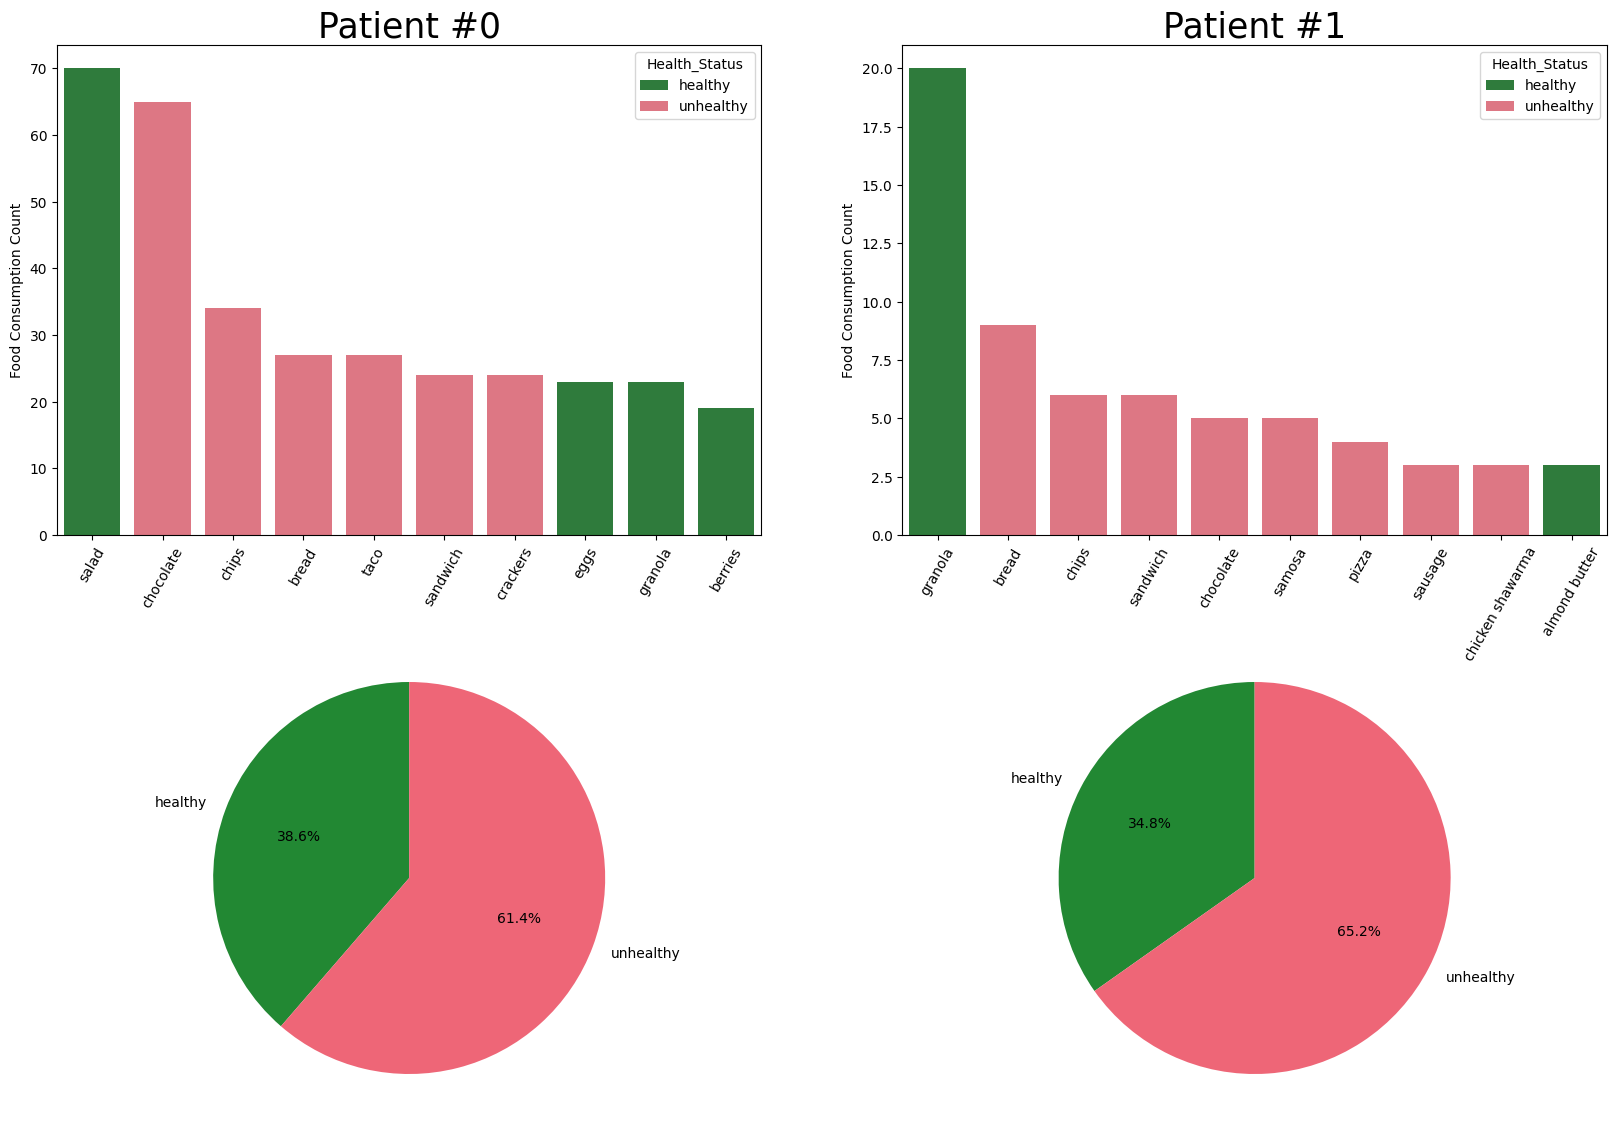

In [51]:
graph_foods([PWD_0_foods, PWD_1_foods])

Patient #0 seems to eat healthier than patient #1. Let's investigate their blood glucose now and see if there is any difference:

In [31]:
from typing_extensions import dataclass_transform
def graph_distributions(patients):

  fig, axs = plt.subplots(1, 2, figsize=(16, 8))

  for count, patient in enumerate(patients):
    daily_data = patient.groupby(by=patient["date"].dt.date)["bgl"].mean() #we will group by date so we don't have too many points

    data = pd.DataFrame()
    data["bgl"] = daily_data.values * (1/18) #in mmol/l
    data["date"] = daily_data.index
    data = data.dropna() #dropping NaNs are easier than imputing in this case

    y_values = data.loc[:, "bgl"]
    x_values = np.linspace(0,1,len(data.loc[:, "bgl"]))
    poly_degree = 4

    coeffs = np.polyfit(x_values, y_values, poly_degree) #we will fit 4th degree polynomial
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)

    axs[count].set_title(f"Patient #{count} Daily Average Blood Glucose in mmol/l")
    axs[count].set_ylabel("mmol/l")
    axs[count].tick_params(axis='x', labelrotation=40)
    axs[count].plot(data.loc[:, "date"], data.loc[:,"bgl"], "ro")
    axs[count].plot(data.loc[:, "date"], y_hat)

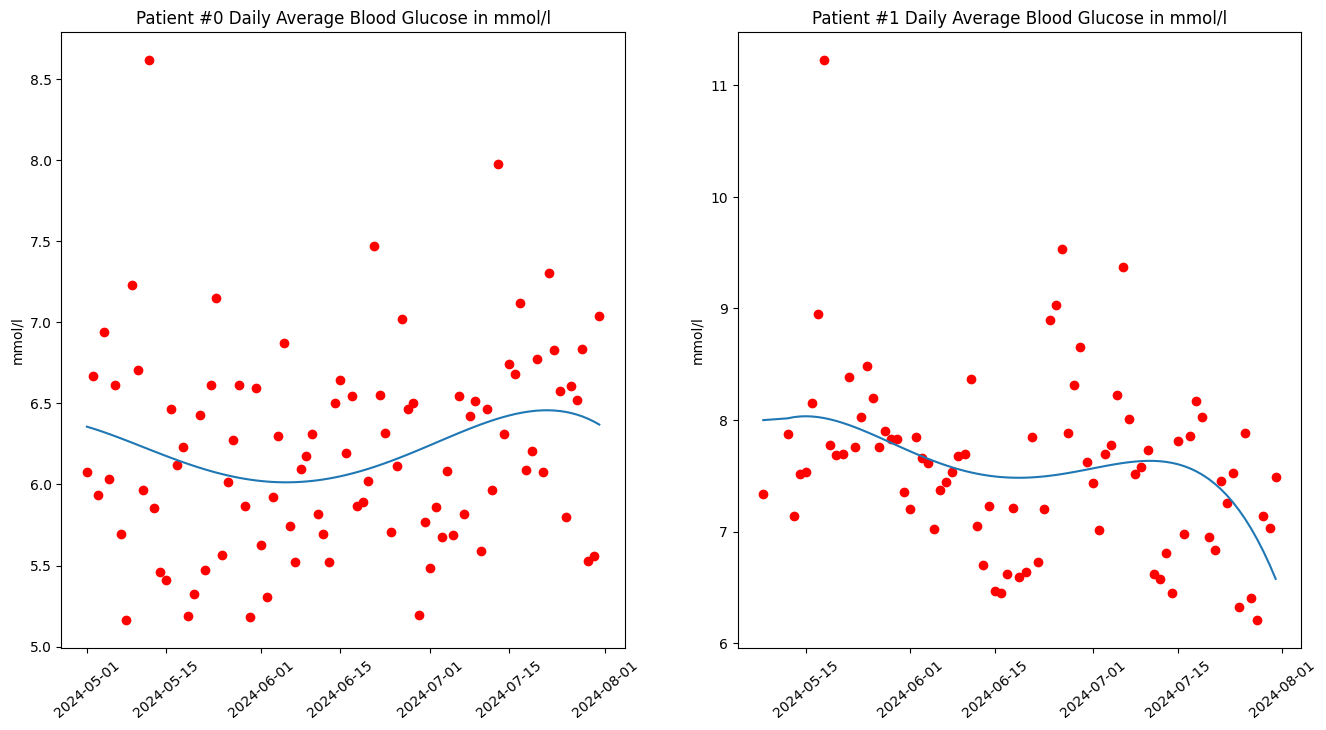

In [32]:
graph_distributions([df[df["PWD"] == 0], df[df["PWD"] == 1]])

In [33]:
def calc_average_bgl(patient): #we get average blood sugar over all months
  return (patient["bgl"] * (1/18)).mean()

In [34]:
patient_0_avg = calc_average_bgl(df[df["PWD"] == 0])
patient_1_avg = calc_average_bgl(df[df["PWD"] == 1])

print(f"Patient #0 Average Glucose Levels (mmol/l): {patient_0_avg}")
print(f"Patient #1 Average Glucose Levels (mmol/l): {patient_1_avg}")

Patient #0 Average Glucose Levels (mmol/l): 6.219231803603755
Patient #1 Average Glucose Levels (mmol/l): 7.67006379851926


It seems that Patient #0, on average, has lower glucose levels, with an overall average of 6.22. Patient #1, meanwhile, has an average closer to 7.67. However, from distributions, we can see a declining trend for patients's #1 glucose levels. It may point to an overall improvement in their lifestyle and treatment of diabetes.

#### Data Visualization #2: Glucose Spikes Investigation

Hyperglycemia is a condition associated with a high level of glucose in the bloodstream. In diabetics, the condition is usually the result of a skipped insulin dose or insufficient insulin injection. Untreated, high blood glucose levels may result in long-term complications, such as nerve damage or cardiovascular disease. (https://www.mayoclinic.org/diseases-conditions/hyperglycemia/symptoms-causes/syc-20373631)



Let's analyze the data we have on our two patients and see if they ever reached the threshold of 13.3 mmol/l, a glucose level that will be considered dangerous if it persists for a long time. From now on, the days when patient reached glucose level of 13.3 mmol/l or high will be called "extreme days". We will also examine food consumption and insulin doses prior to such spikes.

Firstly, let's identify the dates when patients have experiences bgl higher than 13.3 mmol/l:

In [35]:
def get_spike_dates(patient):
  return patient[patient["bgl"] * (1/18) > 13.3]["date"].apply(lambda x: x.date()).unique()

In [36]:
patient_0_spike_dates = get_spike_dates(df[df["PWD"]==0])
patient_1_spike_dates = get_spike_dates(df[df["PWD"]==1])

In [37]:
print(f"Patient #0 experienced spikes on the following dates:\n {list(patient_0_spike_dates)}")

print(f"Patient #1 experienced spikes on the following dates:\n {list(patient_1_spike_dates)}")

Patient #0 experienced spikes on the following dates:
 [datetime.date(2024, 5, 2), datetime.date(2024, 5, 10), datetime.date(2024, 5, 27), datetime.date(2024, 7, 7)]
Patient #1 experienced spikes on the following dates:
 [datetime.date(2024, 5, 18), datetime.date(2024, 5, 25), datetime.date(2024, 5, 30), datetime.date(2024, 6, 2), datetime.date(2024, 6, 24), datetime.date(2024, 6, 27), datetime.date(2024, 6, 29), datetime.date(2024, 7, 4), datetime.date(2024, 7, 5), datetime.date(2024, 7, 6), datetime.date(2024, 7, 17), datetime.date(2024, 7, 18), datetime.date(2024, 7, 26)]


It seems to be that Patient #1 had significantly more days with bgl spikes > 13.3 than Patient #0. Let's investigate how those spiked looked. First, let's get data for each day there was an extreme spike for each patient:

In [38]:
def get_extreme_days(patient_df, spike_dates):
  extreme_days = []
  for i in spike_dates:
    extreme_days.append(patient_df[patient_df["date"].apply(lambda x: x.date()) == i])

  return extreme_days


In [39]:
patient_0_extreme_days = get_extreme_days(df[df["PWD"] == 0], patient_0_spike_dates)
patient_1_extreme_days = get_extreme_days(df[df["PWD"] == 1], patient_1_spike_dates)

Every element of patient_0_extreme_days is a dataframe with the glucose data from one particular day where spike over 13.3 was detected:

In [40]:
patient_0_extreme_days[0].head()

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,PWD
301,2024-05-02 00:00:31,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
302,2024-05-02 00:05:30,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
303,2024-05-02 00:10:30,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
304,2024-05-02 00:15:30,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0
305,2024-05-02 00:20:30,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,0


Let's define the function to graph each individual "extreme" day:

In [54]:
def plot_day(interval):
  x = interval["date"]
  y = interval["bgl"] * (1/18)

  interval["text"] = interval["text"].fillna("")

  f = plt.figure(figsize=(12,6))
  ax = plt.axes()

  plt.tight_layout()

  plt.plot(x, y, 'b')
  plt.axhline(y = 13.3, color = 'r')
  plt.text(x.values[0], 13.3, 'Critical Glucose Level: 13.3', fontsize=8, va='center', ha='left', backgroundcolor='w')

  offset = 4
  declutter = 0.4 #declutter shifts text labels along y-axis so they don't overlap as much


  for i, j, text, msg_type in zip(x, y, interval["text"], interval["msg_type"]):
    if msg_type == "ANNOUNCE_MEAL": #if it's a meal, we need to create a point and label it

      t = plt.text(x = i, y = j + offset + declutter, s = text, rotation=0, horizontalalignment="center")

      plt.vlines(x=i, ymin = j, ymax = j + offset + declutter - 0.1, linestyles = 'dashed') #add a vertical dashed line

      declutter *= -1

      plt.plot(i, j, '*',color="green",  markersize=10)

    if (msg_type == "DOSE_INSULIN"): #if it's insulin, we add a triangle. We will scale the size of triange with insulin dose
      plt.plot(i, j, 'v', markersize=2 * int(re.search("[0-9]", text).group()), color="black")

  legend_elements = [Line2D([0], [0], marker='*', color='green', lw= 0, markersize=10, label='Food Consumption'),
                     Line2D([0], [0], marker='v', color='black', lw= 0, markersize=10, label='Insulin Intake')] #and we add a legend


  ax.legend(handles=legend_elements, loc='upper right')
  ax.set_ylabel("mmol/l")
  ax.set_title(f"Glucose Levels on { pd.to_datetime(x.values[0]).date()}")

  formatter = matplotlib.dates.DateFormatter('%H:%M')
  ax.xaxis.set_major_formatter(formatter)

  plt.show()

Let's observe patient #0 and they glucose levels on the "extreme" days:

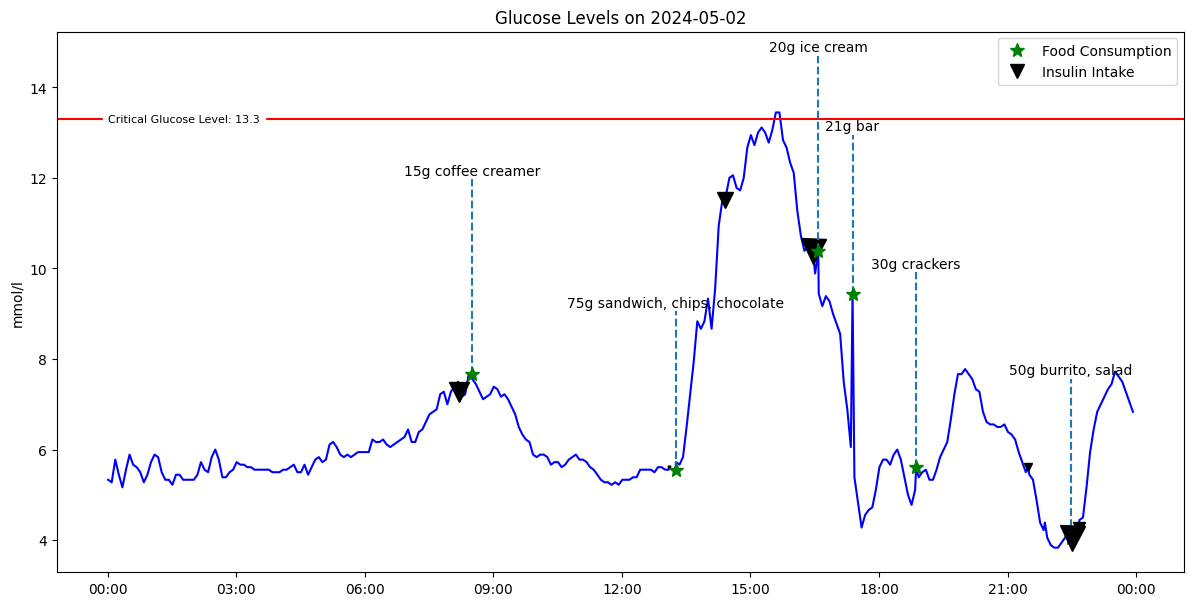

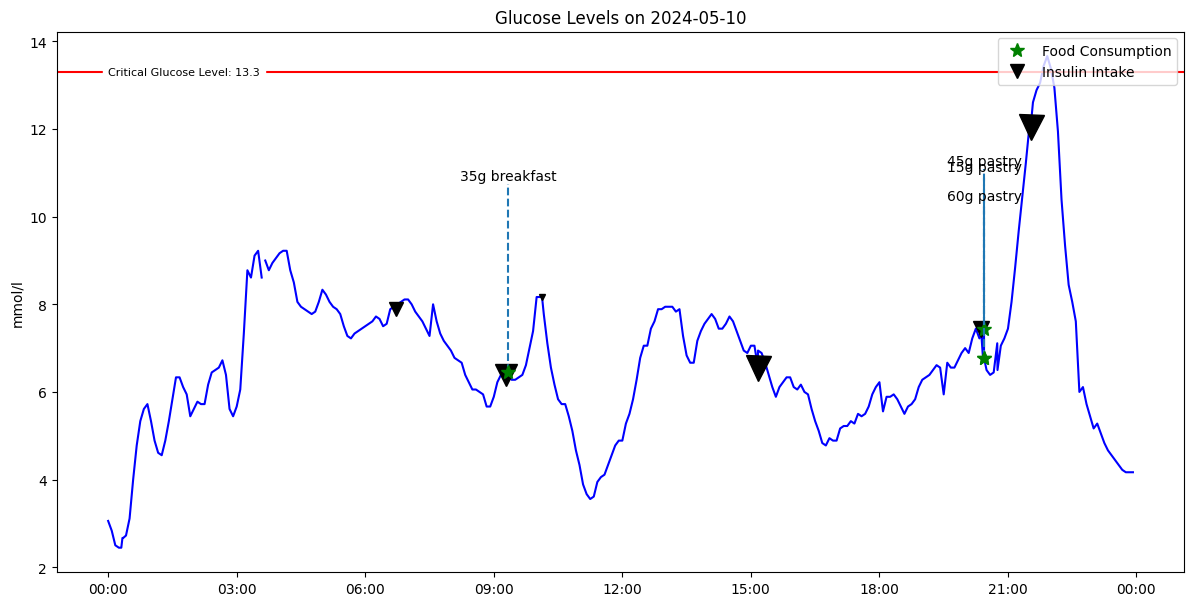

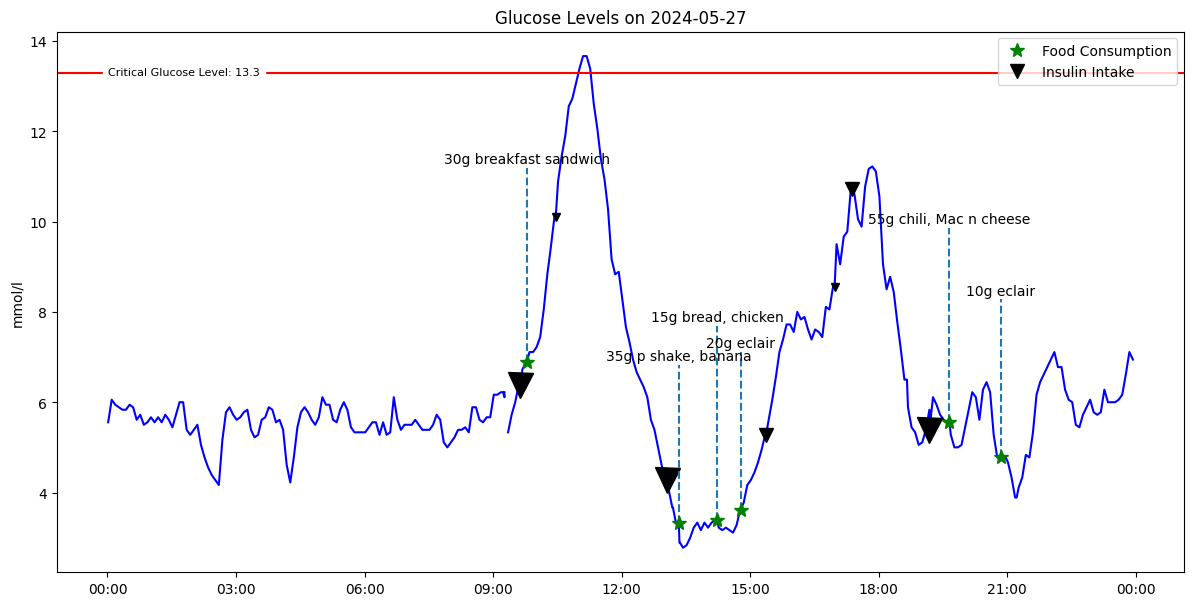

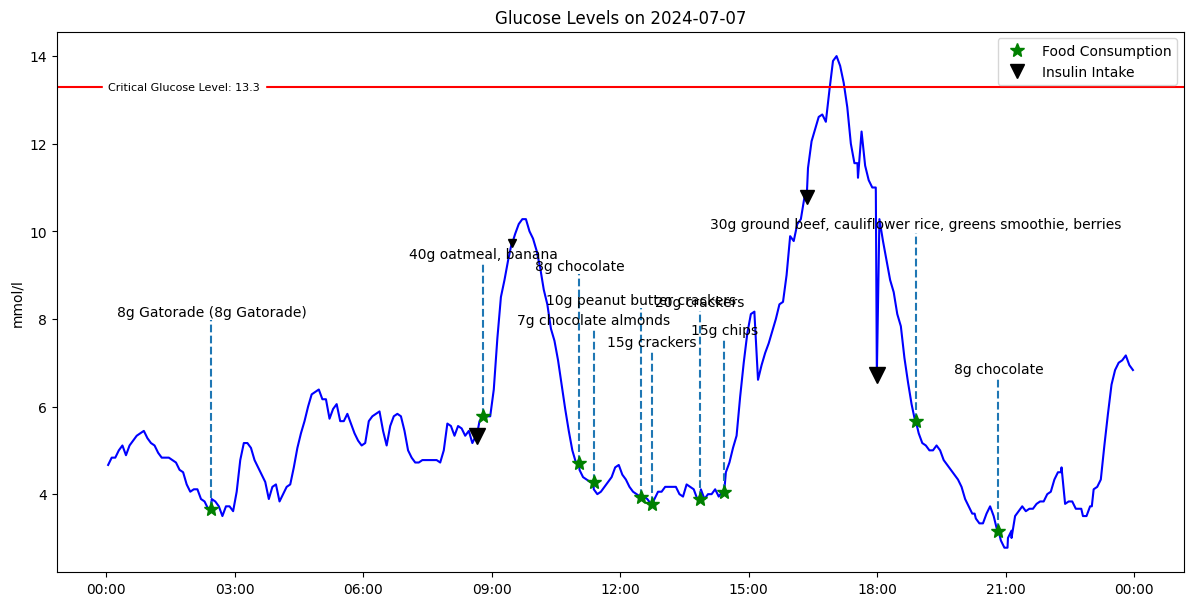

In [55]:
for i in patient_0_extreme_days:
  plot_day(i)
  plt.show()

Patients #0 spikes tend to not last long, as their blood glucose quickly decreases after every spike. They take insulin in advance, which results in a rapid decrease of blood sugar after the spike.

Let's now examine patient #1:

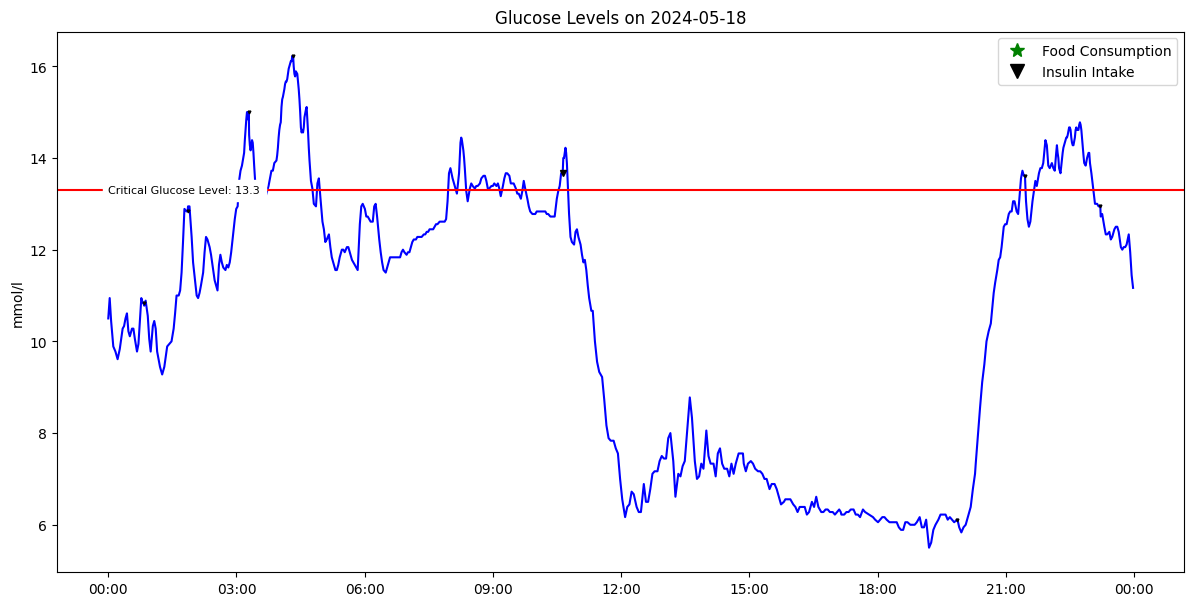

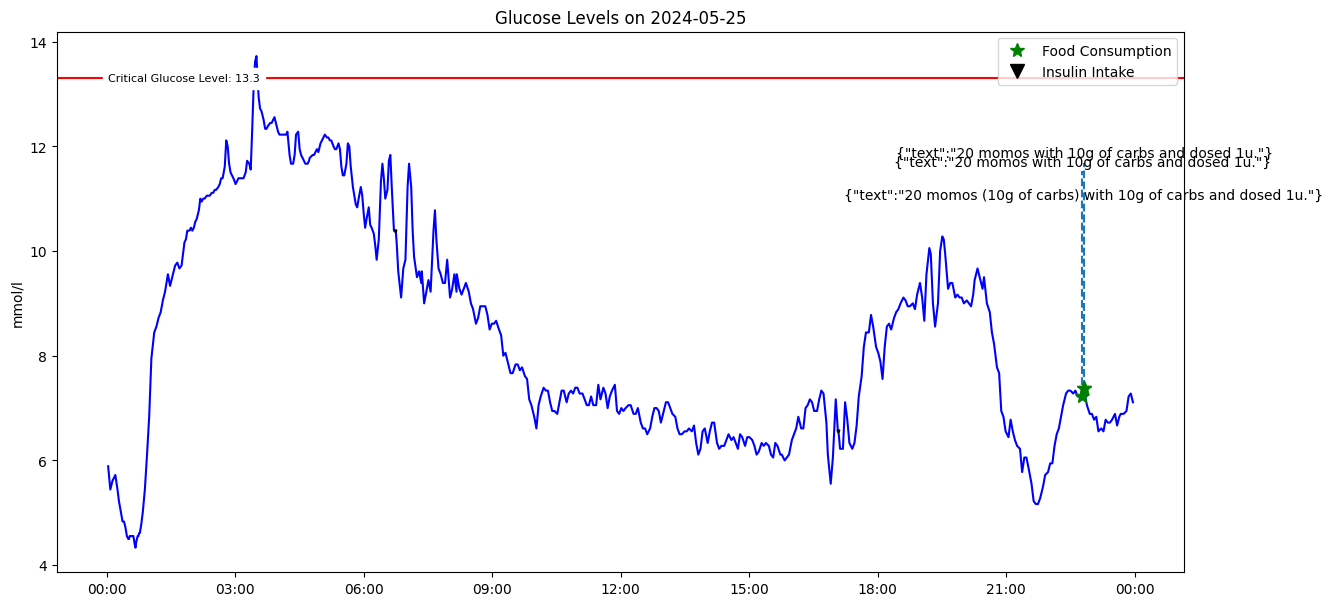

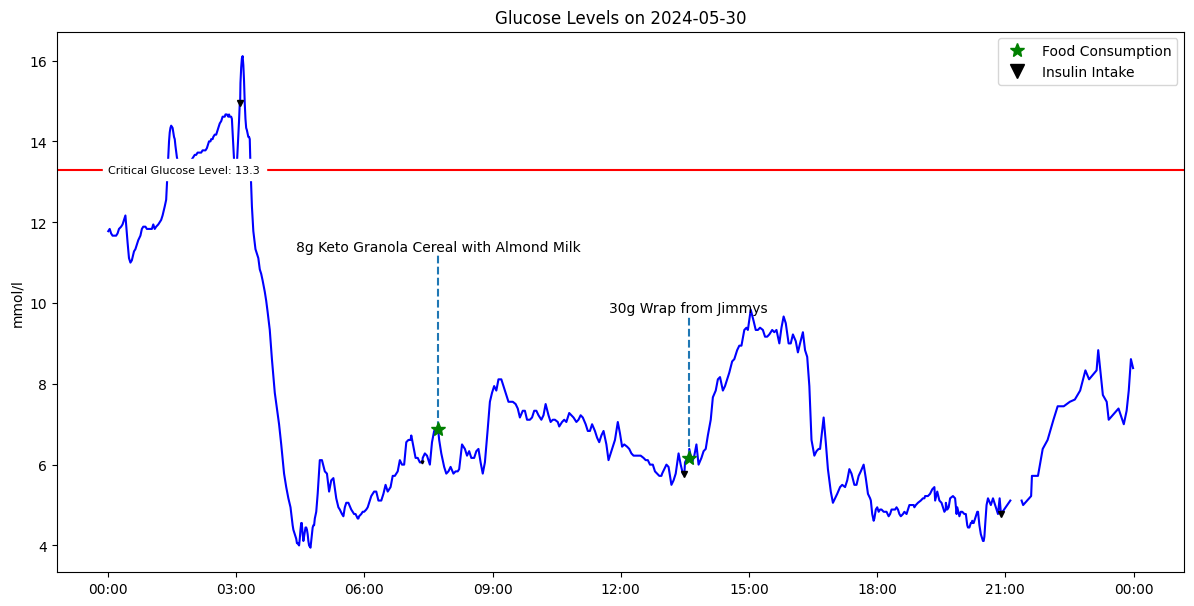

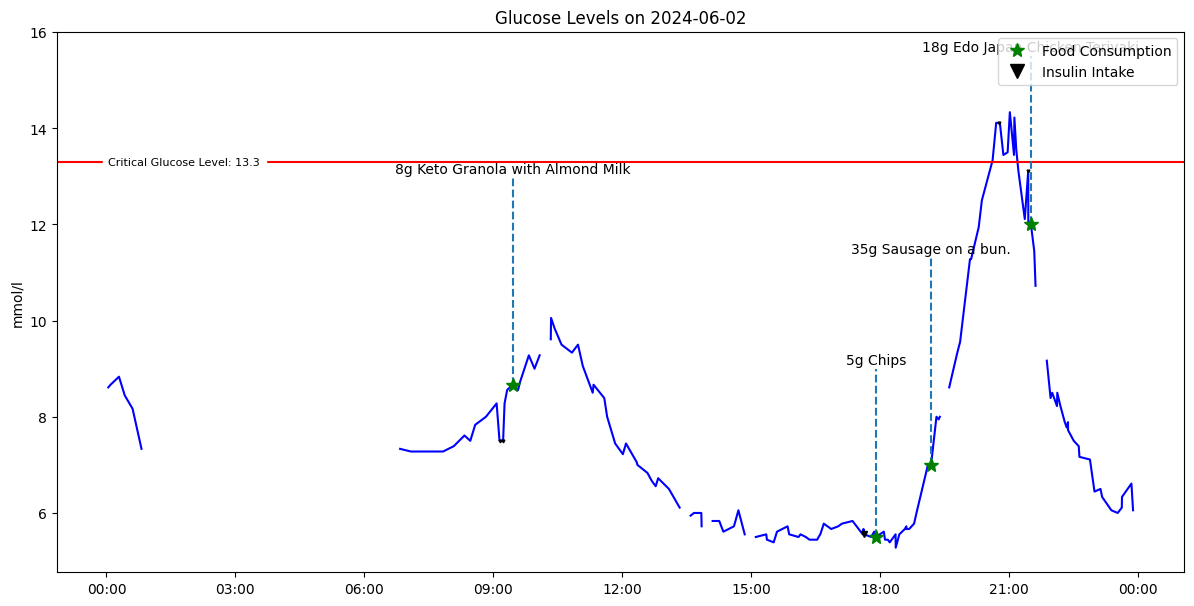

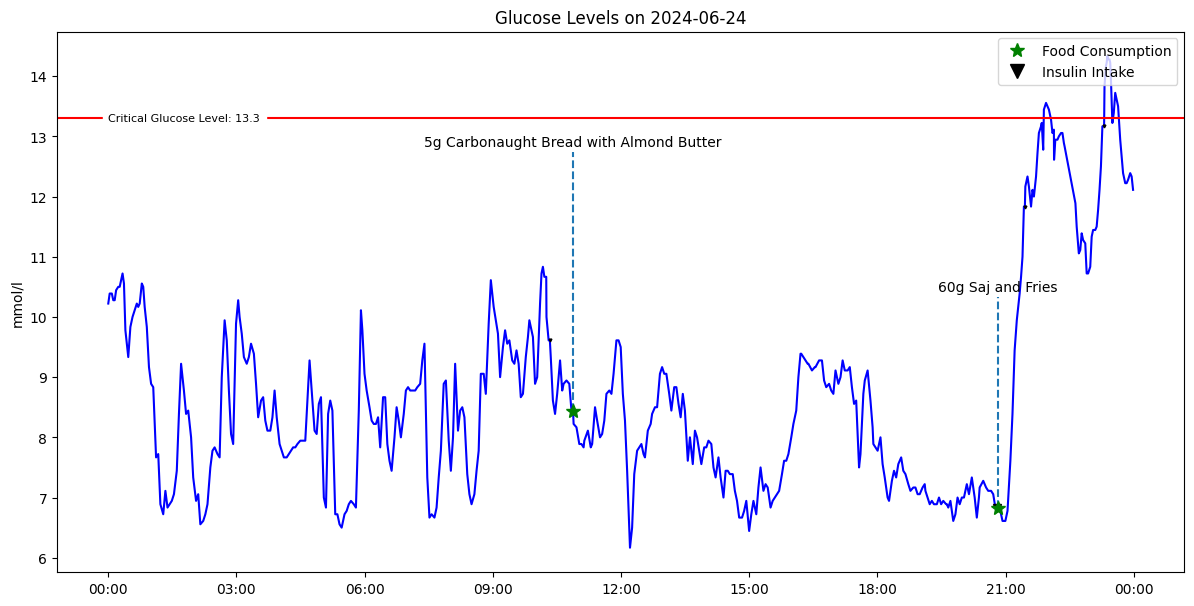

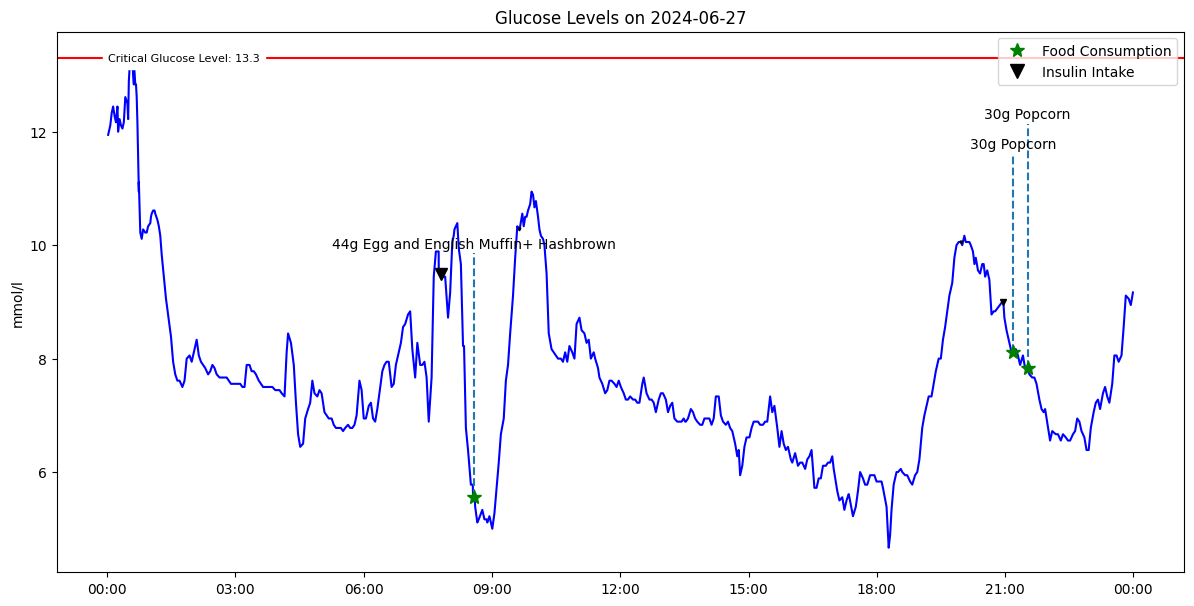

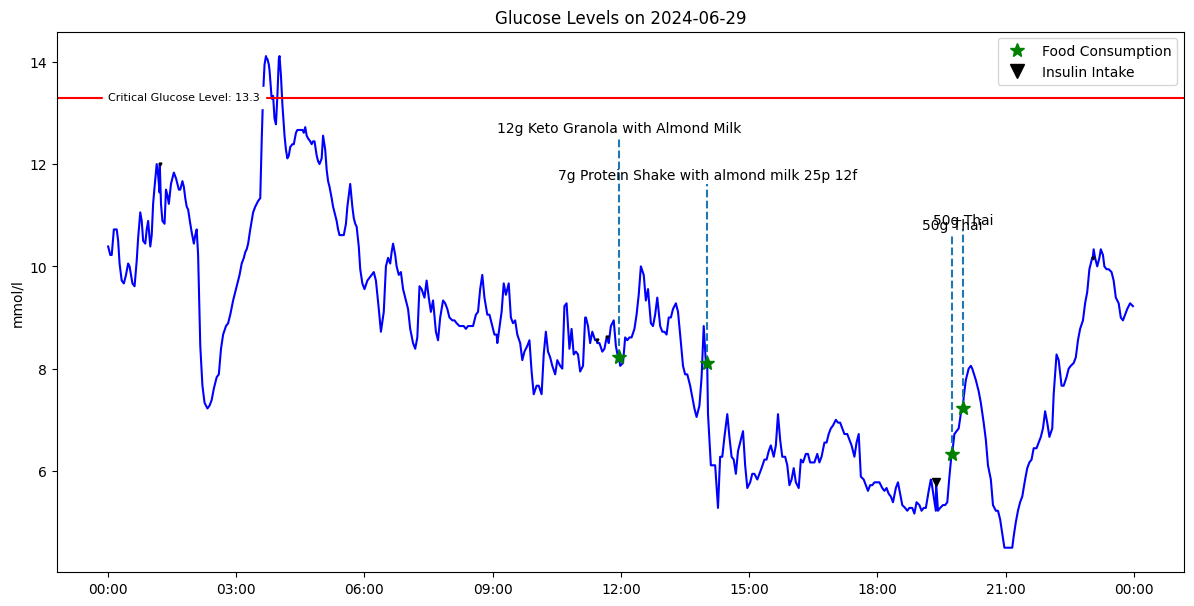

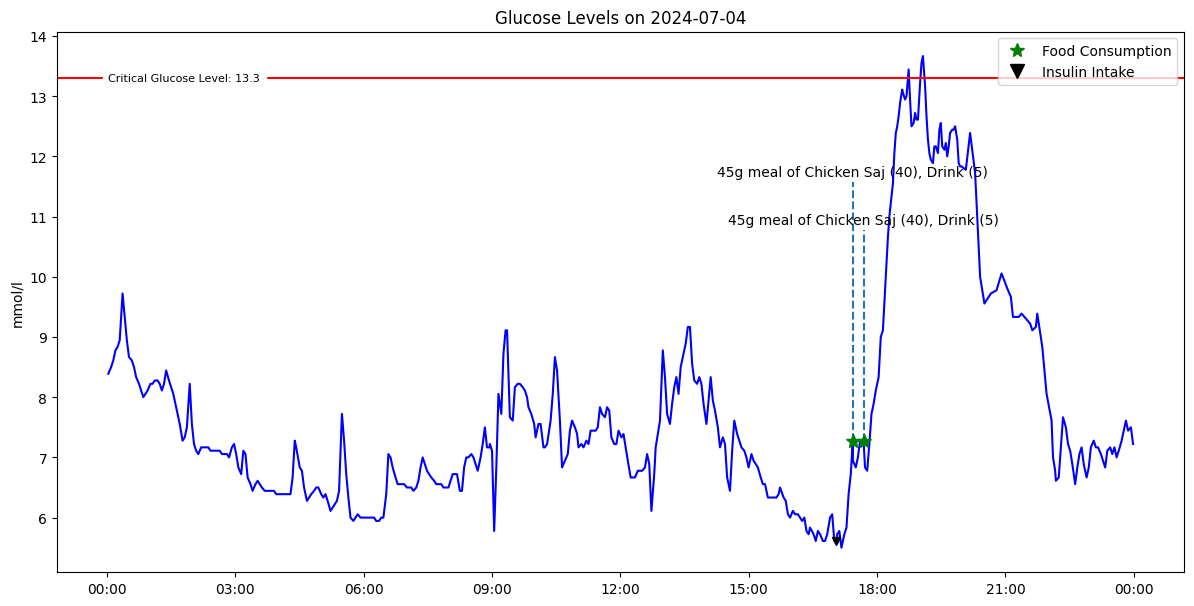

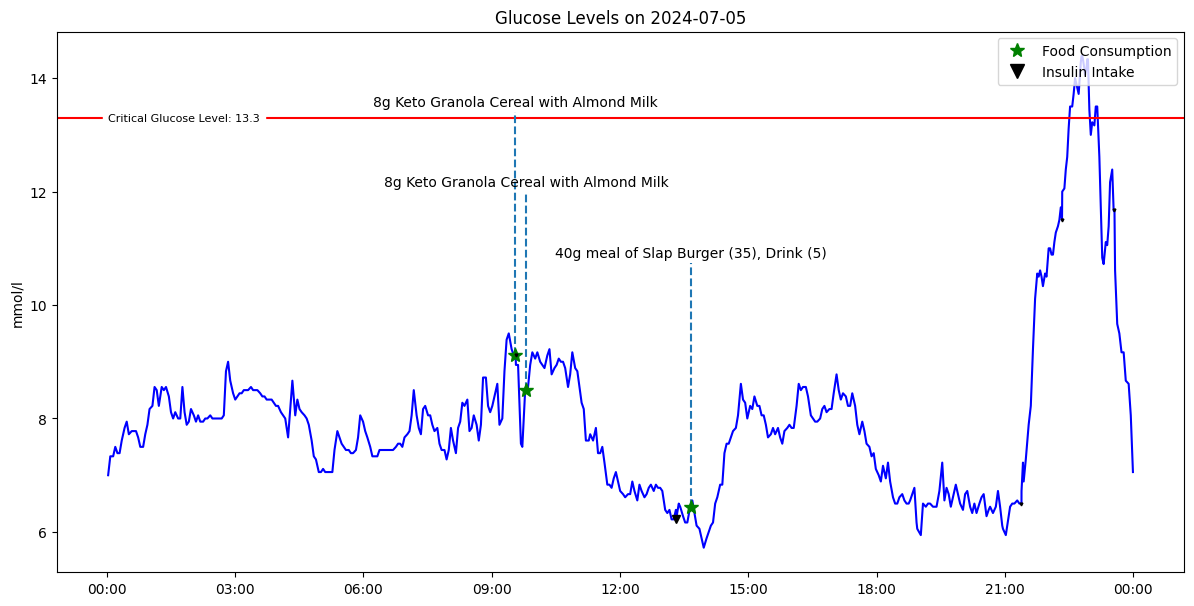

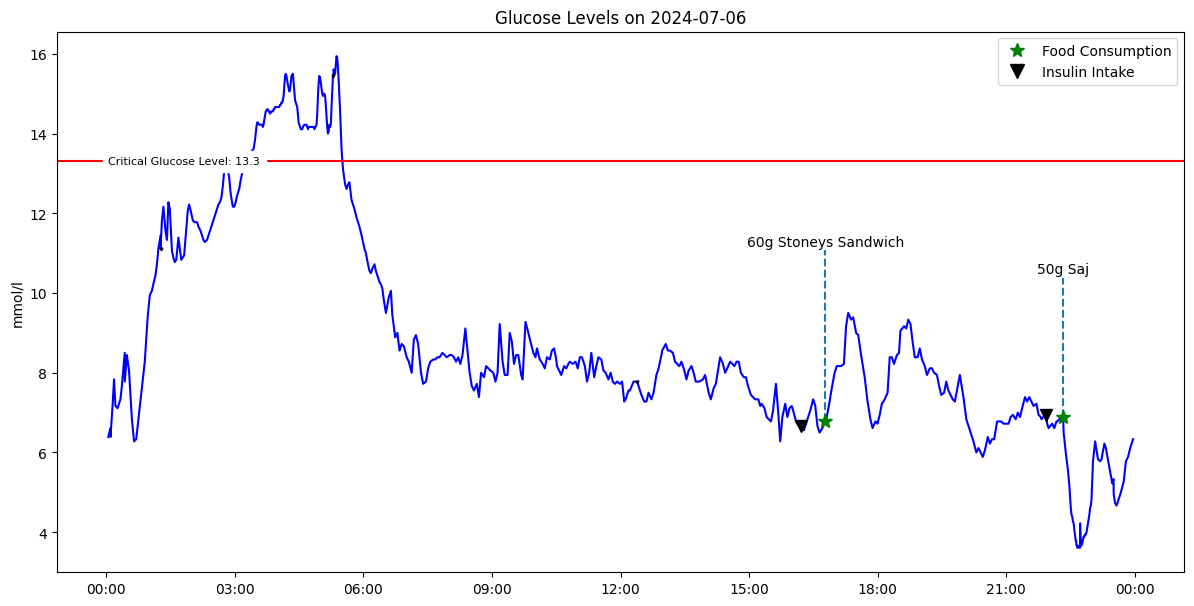

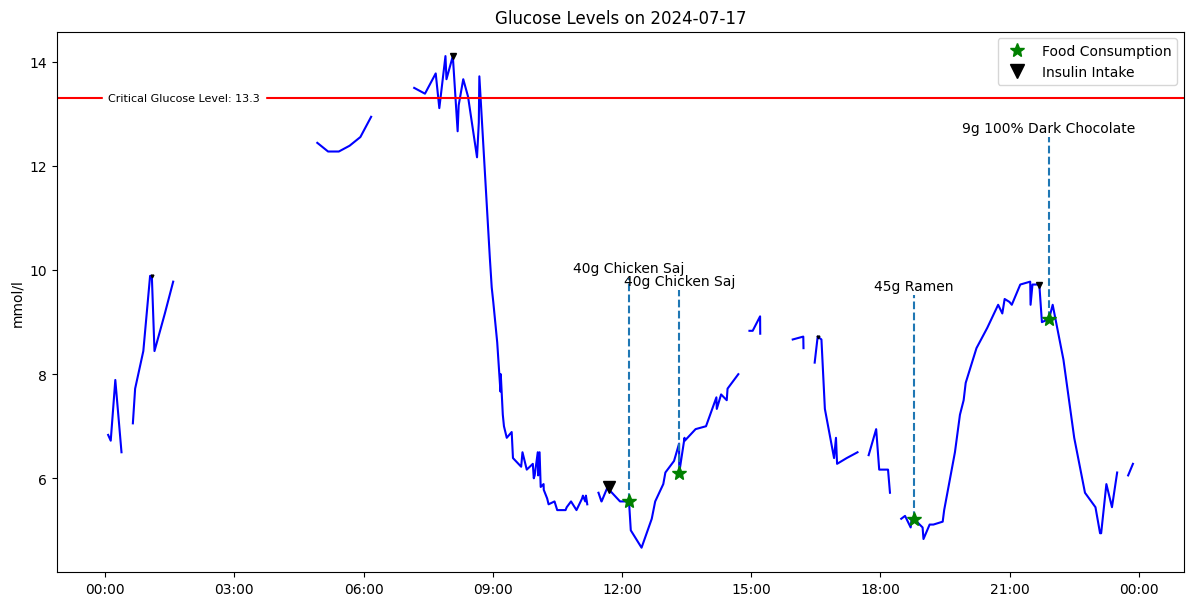

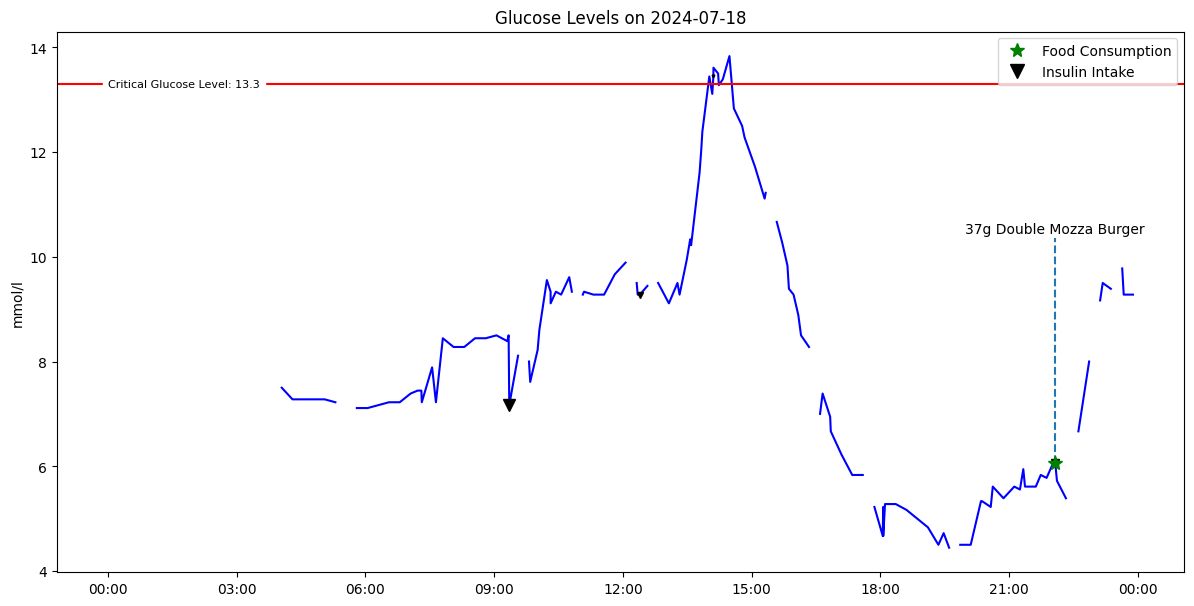

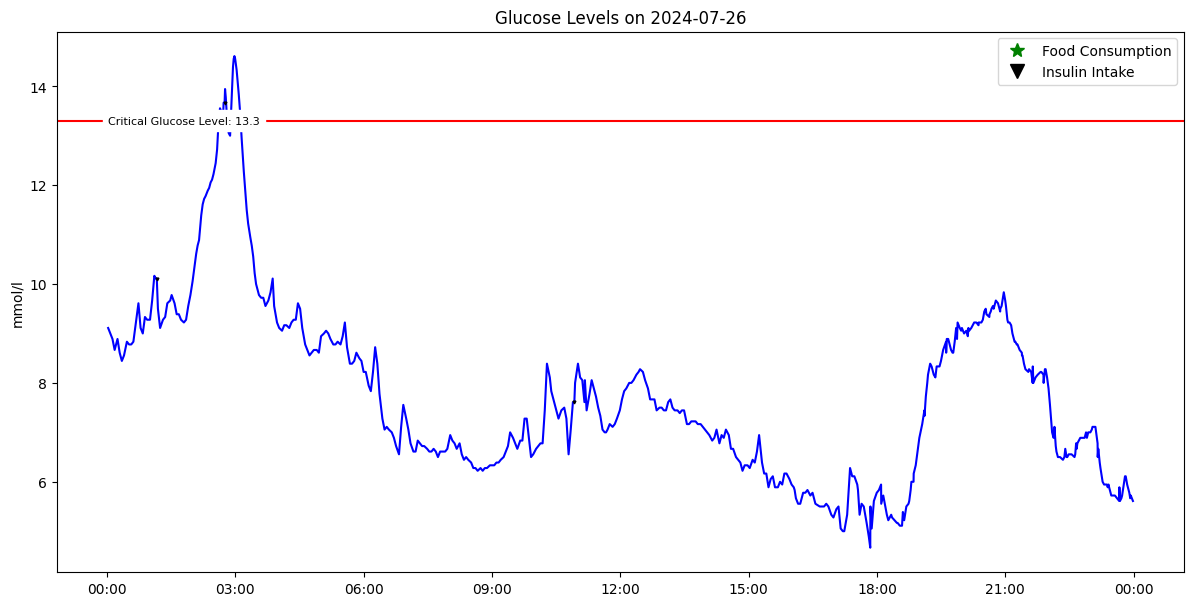

In [43]:
for i in patient_1_extreme_days:
  plot_day(i)
  plt.show()

Behavior of patient #1 is more inconsistent, with some days have multiple or prolonged spikes. Their blood sugar level is higher on average than that of patient #0. Additionally, a lot of data is missing, especially on insulin doses. Such high blood sugar may be a cause of concern and might require readjustment of approach to their treatment of diabetes.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.*

1. Is diabetes management a bigger issue in North America in comparison to Europe/Asia? Ultraprocessed foods are much more common here, which I presume makes creating a diet for diabetes even harder. Do you have any data on this issue?
2. How is insulin distributed in Canada? I am aware that insulin itself is partially covered by the government, but what about all the other necessary products, like syringes, pumps, or test strips?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future.

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`